In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


from datetime import datetime

%matplotlib inline

In [2]:
location = "DC_Properties.csv"
df = pd.read_csv(location)
df.head()
#imported data set

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [3]:
df2= df[['BEDRM','BATHRM','GBA','PRICE','WARD','STYLE','SALEDATE','KITCHENS']]
df2.head()
#reduced data size by getting rid of unnecessary columns

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
0,4,4,2522.0,1095000.0,Ward 2,3 Story,2003-11-25 00:00:00,2.0
1,5,3,2567.0,NaN,Ward 2,3 Story,2000-08-17 00:00:00,2.0
2,5,3,2522.0,2100000.0,Ward 2,3 Story,2016-06-21 00:00:00,2.0
3,5,3,2484.0,1602000.0,Ward 2,3 Story,2006-07-12 00:00:00,2.0
4,3,2,5255.0,NaN,Ward 2,3 Story,NaN,1.0


In [14]:
len(df2)

57898

In [15]:
df2.isnull().sum()

BEDRM       0
BATHRM      0
GBA         0
PRICE       0
WARD        0
STYLE       0
SALEDATE    0
KITCHENS    0
dtype: int64

In [16]:
df2=df2.dropna()

In [17]:
df2.count()

BEDRM       57898
BATHRM      57898
GBA         57898
PRICE       57898
WARD        57898
STYLE       57898
SALEDATE    57898
KITCHENS    57898
dtype: int64

In [18]:
df2.isnull().sum()
#clean data

BEDRM       0
BATHRM      0
GBA         0
PRICE       0
WARD        0
STYLE       0
SALEDATE    0
KITCHENS    0
dtype: int64

In [19]:
df2.head()

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
0,4,4,2522.0,1095000.0,Ward 2,3 Story,2003-11-25 00:00:00,2.0
2,5,3,2522.0,2100000.0,Ward 2,3 Story,2016-06-21 00:00:00,2.0
3,5,3,2484.0,1602000.0,Ward 2,3 Story,2006-07-12 00:00:00,2.0
5,5,3,5344.0,1950000.0,Ward 2,4 Story,2010-02-26 00:00:00,1.0
7,4,3,2401.0,1050000.0,Ward 2,3 Story,2011-09-29 00:00:00,2.0


In [10]:
pd.pivot_table(df2,index=["BEDRM"], values=["PRICE"]).round()

,PRICE
BEDRM,
0,1345881.0
1,436309.0
2,370905.0
3,456579.0
4,659165.0
5,1037030.0
6,1267161.0
7,1717842.0
8,810712.0


In [11]:
pd.pivot_table(df2,index=["BEDRM"], values=["PRICE"],columns=["WARD"],aggfunc=[np.mean],fill_value=0).round(0)

mean                                                         \
           PRICE                                                          
WARD      Ward 1      Ward 2     Ward 3    Ward 4     Ward 5     Ward 6   
BEDRM                                                                     
0       325833.0   3587500.0  2594120.0  316700.0   305957.0  1350413.0   
1       399136.0    814618.0  1294000.0  320533.0   211724.0   345632.0   
2       468224.0    777097.0   640142.0  316488.0   295300.0   482697.0   
3       500714.0   1030660.0   739864.0  418098.0   381272.0   568302.0   
4       637269.0   1388698.0   975389.0  581978.0   478053.0   722577.0   
5       781456.0   1734105.0  1421718.0  751975.0   573721.0   872040.0   
6       843308.0   2282718.0  1939516.0  814018.0   542236.0   892812.0   
7       907553.0   2486571.0  2700912.0  887765.0   623350.0  1000159.0   
8       819119.0   3038708.0  2638443.0  528914.0   407348.0   573041.0   
9      1037317.0   6007558.0  4422222.0  791036.0   335000.0   653279.0   
10      918000.0    843000.0  1297000.0       0.0   350000.0   921250.0   
11           0.0    280000.0        0.0  700000.0  2200000.0  1850000.0   
12      748000.0  23960287.0        0.0  291500.0   560833.0   200000.0   
13           0.0         0.0        0.0       0.0        0.0        0.0   
14      925000.0         0.0        0.0       0.0        0.0        0.0   
15     1105000.0         0.0        0.0       0.0        0.0        0.0   
20     1900000.0         0.0        0.0       0.0        0.0        0.0   

                            
                            
WARD     Ward 7     Ward 8  
BEDRM                       
0      168944.0  2777021.0  
1      191259.0   135741.0  
2      184819.0   180244.0  
3      238975.0   224318.0  
4      298160.0   278251.0  
5      323470.0   265254.0  
6      295781.0   263135.0  
7      265101.0   327200.0  
8      280391.0   355596.0  
9      340000.0   253700.0  
10     353500.0   238911.0  
11          0.0   348920.0  
12     415000.0   306438.0  
13          0.0   442500.0  
14          0.0        0.0  
15          0.0        0.0  
20          0.0        0.0

In [20]:
bins = [0,10000,300000, 400000,500000,600000,700000,80000000]
group_names = ['Poverty','Working poor','Working class',
            'Middle class','New Money','Upper class','One Percent']
nf['Affordability'] = pd.cut(nf['PRICE'], bins, labels=group_names)
nf.head(10)

NameError: name 'nf' is not defined

In [13]:
df2.groupby(['PRICE','WARD','STYLE']).mean().round(0)


BEDRM  BATHRM      GBA  KITCHENS
PRICE      WARD   STYLE                                            
1.0        Ward 5 2 Story            3.0     1.0   1420.0       1.0
           Ward 8 3 Story            6.0     3.0   2150.0       3.0
10.0       Ward 1 2 Story            3.0     1.0    990.0       1.0
           Ward 2 2 Story            3.0     2.0   2272.0       2.0
           Ward 5 2 Story            3.0     2.0   1380.0       1.0
           Ward 7 2 Story            2.0     1.0    880.0       1.0
250.0      Ward 1 2 Story            2.0     2.0   1603.0       2.0
                  3 Story            5.0     2.0   2817.0       2.0
           Ward 4 2 Story            3.0     1.0   1444.0       1.0
           Ward 5 2 Story            5.0     3.0   1462.0       1.0
                  3 Story            6.0     5.0   2596.0       2.0
           Ward 6 2 Story            3.0     2.0   1574.0       2.0
           Ward 7 2 Story            3.0     1.0    997.0       1.0
           Ward 8 2 Story            2.0     1.0   1132.0       1.0
500.0      Ward 1 2 Story            2.0     2.0   1784.0       2.0
                  3 Story            4.0     4.0   2421.0       2.0
           Ward 5 2 Story            4.0     2.0   1734.0       2.0
           Ward 6 3 Story            7.0     2.0   4158.0       2.0
936.0      Ward 6 2 Story            4.0     2.0   2142.0       1.0
1000.0     Ward 5 2 Story            3.0     1.0   1024.0       1.0
           Ward 7 2 Story            3.0     1.0    988.0       1.0
           Ward 8 2 Story            4.0     4.0   2736.0       4.0
1377.0     Ward 1 2 Story            3.0     1.0   1424.0       1.0
2000.0     Ward 7 2 Story            3.0     1.0   1396.0       1.0
3000.0     Ward 7 1 Story            3.0     2.0   1170.0       1.0
3997.0     Ward 7 2 Story            3.0     1.0   1188.0       1.0
4101.0     Ward 8 2 Story            4.0     4.0   2464.0       4.0
4156.0     Ward 4 2.5 Story Fin      4.0     2.0   1914.0       1.0
4500.0     Ward 1 3 Story            3.0     3.0   2443.0       2.0
4850.0     Ward 8 2 Story            3.0     2.0   1200.0       1.0
...                                  ...     ...      ...       ...
7550000.0  Ward 3 2 Story            4.0     4.0   3354.0       4.0
7576980.0  Ward 6 2 Story            3.0     1.0   1316.0       1.0
7652000.0  Ward 3 2.5 Story Fin      5.0     5.0   6465.0       1.0
7700000.0  Ward 3 2.5 Story Fin      6.0     5.0   7788.0       1.0
7785000.0  Ward 3 2 Story            8.0     8.0  11478.0       2.0
7850000.0  Ward 2 2.5 Story Fin      8.0     7.0   8085.0       1.0
7950000.0  Ward 3 3 Story            7.0     6.0   7560.0       1.0
8100000.0  Ward 2 3 Story            9.0     8.0   6441.0       1.0
8375000.0  Ward 3 3 Story            7.0     6.0   8148.0       2.0
8450000.0  Ward 2 3 Story            6.0     8.0   8159.0       1.0
                  4 Story            8.0     9.0   8321.0       1.0
8500000.0  Ward 2 4 Story            9.0     8.0  10001.0       2.0
8600000.0  Ward 2 3.5 Story Unfin    9.0     7.0   8840.0       1.0
9000000.0  Ward 2 3 Story            6.0     7.0   6164.0       1.0
9100000.0  Ward 3 2.5 Story Fin      6.0     9.0   6518.0       2.0
10400000.0 Ward 3 3 Story            7.0     5.0  10379.0       1.0
10750000.0 Ward 3 3 Story            7.0     7.0   6997.0       3.0
11000000.0 Ward 6 2 Story            0.0     0.0    792.0       1.0
           Ward 7 2 Story            4.0     4.0   3420.0       4.0
11111111.0 Ward 2 3 Story            8.0     8.0   6937.0       1.0
11984000.0 Ward 2 4 Story            6.0     6.0  10760.0       2.0
12250000.0 Ward 3 2 Story            9.0    12.0  12713.0       2.0
14000000.0 Ward 3 3 Story            6.0     5.0   7725.0       2.0
15000000.0 Ward 3 2 Story            7.0    11.0  11616.0       2.0
16100000.0 Ward 2 3 Story            9.0     9.0   7910.0       2.0
18000000.0 Ward 3 2.5 Story Fin      7.0     9.0  15673.0       2.0
22000000.0 Ward 2 2.5 S

In [21]:
df2.groupby("WARD")

In [22]:
meanprice = df2['PRICE'].mean()
stdprice = df2['PRICE'].std()
toprange = meanprice + stdprice * 1.96
botrange = meanprice - stdprice * 1.96

copydf2= df2.copy()
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] > toprange].index)
copydf2 = copydf2.drop(copydf2[copydf2['PRICE'] < botrange].index)

copydf2.head()
#get rid of outliers

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
0,4,4,2522.0,1095000.0,Ward 2,3 Story,2003-11-25 00:00:00,2.0
3,5,3,2484.0,1602000.0,Ward 2,3 Story,2006-07-12 00:00:00,2.0
7,4,3,2401.0,1050000.0,Ward 2,3 Story,2011-09-29 00:00:00,2.0
8,3,3,1488.0,1430000.0,Ward 2,2 Story,2018-05-03 00:00:00,2.0
14,3,3,2692.0,1325000.0,Ward 2,2 Story,2011-09-30 00:00:00,2.0


In [23]:
len(copydf2)

56206

In [24]:
print(meanprice)
print(stdprice)
print(toprange)
print(botrange)



579923.6760855297
607651.550609751
1770920.7152806418
-611073.3631095822


In [25]:
testmean=df2['PRICE'].mean()
testmean

579923.6760855297

In [26]:
copydf2.corr()

,BEDRM,BATHRM,GBA,PRICE,KITCHENS
BEDRM,1.000000,0.598983,0.628938,0.314116,0.373266
BATHRM,0.598983,1.000000,0.653121,0.464364,0.435863
GBA,0.628938,0.653121,1.000000,0.454990,0.361815
PRICE,0.314116,0.464364,0.454990,1.000000,0.043218
KITCHENS,0.373266,0.435863,0.361815,0.043218,1.000000


TypeError: Could not convert Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 4Ward 4Ward 4Ward 4Ward 3Ward 3Ward 3Ward 2Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 3Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 2Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 2Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 1Ward 1Ward 1Ward 1Ward 1Ward 1Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 6Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 5Ward 5Ward 4Ward 4Ward 4Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 7Ward 7Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 5Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 7Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 4Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8Ward 8 to numeric

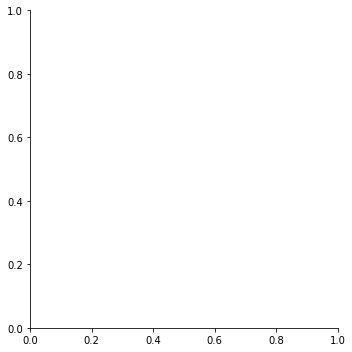

In [38]:
sns.lmplot(x="PRICE", y="WARD", data=copydf2)

In [28]:
ward1df2= copydf2[copydf2["WARD"]=="Ward 1"]
ward1df2.head()

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
156,3,2,1505.0,200000.0,Ward 1,3 Story,2001-06-27 00:00:00,1.0
157,3,2,1281.0,650000.0,Ward 1,3 Story,2013-08-06 00:00:00,1.0
158,1,1,1530.0,660000.0,Ward 1,3 Story,2005-05-25 00:00:00,1.0
160,3,2,1335.0,830000.0,Ward 1,3 Story,2016-09-21 00:00:00,1.0
161,3,1,1170.0,635000.0,Ward 1,2 Story,2017-07-10 00:00:00,1.0


In [29]:
ward1df2.mean()

BEDRM            3.674282
BATHRM           2.224108
GBA           1763.230635
PRICE       580503.528503
KITCHENS         1.392298
dtype: float64

In [57]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [30]:
ward1df2.tail()

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
59777,4,2,1320.0,587000.0,Ward 1,2 Story,2012-10-22 00:00:00,2.0
59778,2,1,1320.0,229900.0,Ward 1,2 Story,2002-08-05 00:00:00,1.0
59779,4,3,1320.0,597304.0,Ward 1,2 Story,2016-11-14 00:00:00,2.0
59780,3,2,1760.0,180000.0,Ward 1,2 Story,2003-01-06 00:00:00,1.0
59781,3,2,1320.0,330000.0,Ward 1,2 Story,2011-07-22 00:00:00,1.0


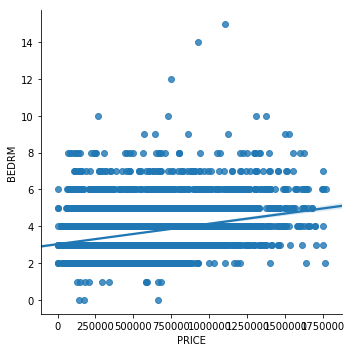

In [31]:
sns.lmplot(x="PRICE", y="BEDRM", data=ward1df2)

In [32]:
ward1df2.corr() #wanted to see if there was a greater correlation between price and bedroom,bathroom, kitchen of sq footage if i 
#reduced the data size to view by ward. 

,BEDRM,BATHRM,GBA,PRICE,KITCHENS
BEDRM,1.000000,0.612239,0.663724,0.305741,0.474787
BATHRM,0.612239,1.000000,0.583448,0.426447,0.550560
GBA,0.663724,0.583448,1.000000,0.362313,0.455522
PRICE,0.305741,0.426447,0.362313,1.000000,0.232369
KITCHENS,0.474787,0.550560,0.455522,0.232369,1.000000


In [33]:
df2.head()

,BEDRM,BATHRM,GBA,PRICE,WARD,STYLE,SALEDATE,KITCHENS
0,4,4,2522.0,1095000.0,Ward 2,3 Story,2003-11-25 00:00:00,2.0
2,5,3,2522.0,2100000.0,Ward 2,3 Story,2016-06-21 00:00:00,2.0
3,5,3,2484.0,1602000.0,Ward 2,3 Story,2006-07-12 00:00:00,2.0
5,5,3,5344.0,1950000.0,Ward 2,4 Story,2010-02-26 00:00:00,1.0
7,4,3,2401.0,1050000.0,Ward 2,3 Story,2011-09-29 00:00:00,2.0


In [68]:
df3=df2[['PRICE','WARD']]
df3.head()

,PRICE,WARD
0,1095000.0,Ward 2
2,2100000.0,Ward 2
3,1602000.0,Ward 2
5,1950000.0,Ward 2
7,1050000.0,Ward 2


In [69]:
df3['PRICE'].mean()

579923.6760855297

In [70]:
df3.scatter(bos.RM, bos.PRICE) 
df3.xlabel("Average number of rooms per dwelling (RM)") 
df3.ylabel("Housing Price") 
df3.title("Relationship between RM and Price") 
df3.show()

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [54]:
########################################################################################
##
##        Project #3
##
##     Now that you know your data a lot better and have an idea of what features 
##     (columns) may be correlated towards predicting the price of a home, 
##     build a linear regression model using the SciKit-Learn library to test those features. 
##     What kind of results did you get? Try refining your data to see how that affects your model.
##
##
##     Then build a logistic regression model and a decision tree model to try to predict the ward or quadrant  
##     (your choice) that a house in DC would be in based on certain features. 
##     Compare the two types of models. Which one do you think is "best" at predicting the target variable?
##
##
########################################################################################

In [40]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [49]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [50]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [51]:
df.groupby(['ROOMS', 'AYB']).mean()

Unnamed: 0     BATHRM  HF_BATHRM  NUM_UNITS  BEDRM  YR_RMDL  \
ROOMS AYB                                                                      
0     1890.0    7809.000000   0.000000   0.000000   2.000000    0.0   2014.0   
      1892.0    2859.000000   0.000000   0.000000   1.000000    0.0   2000.0   
      1900.0   19998.888889   1.444444   0.333333   1.222222    0.0   2009.5   
      1904.0    6400.000000   2.000000   0.000000   1.000000    0.0      NaN   
      1905.0   93716.142857   1.142857   0.142857   1.000000    0.0   2006.0   
      1906.0    4624.666667   1.333333   0.000000   1.000000    0.0      NaN   
      1908.0   54939.000000   0.000000   0.000000   3.000000    0.0      NaN   
      1909.0   59947.500000   0.000000   0.000000   1.000000    0.0   2015.0   
      1910.0   51200.600000   1.200000   0.000000   1.200000    0.0      NaN   
      1911.0   41352.500000   1.000000   0.250000   1.000000    0.0   1970.5   
      1912.0   50384.000000   1.000000   0.000000   1.000000    0.0      NaN   
      1913.0   49870.000000   1.000000   0.000000   1.000000    0.0      NaN   
      1915.0   52300.500000   3.000000   0.000000   1.500000    0.0      NaN   
      1916.0   41601.000000   1.000000   0.000000   1.000000    0.0      NaN   
      1917.0   97374.000000   1.000000   0.000000   1.000000    0.0      NaN   
      1918.0  137411.000000   0.000000   0.000000        NaN    0.0      NaN   
      1920.0  155007.000000   0.000000   0.000000        NaN    0.0   1983.0   
      1923.0   48679.000000   1.000000   1.000000   1.000000    0.0      NaN   
      1924.0   87536.000000   1.000000   0.500000   1.000000    0.0      NaN   
      1925.0   68578.222222   1.000000   0.111111   1.111111    0.0   1991.0   
      1926.0   85320.375000   0.875000   0.000000   1.000000    0.0      NaN   
      1927.0  107452.000000   1.333333   0.000000   1.000000    0.0   1983.0   
      1928.0   88345.000000   1.000000   0.000000   1.000000    0.0      NaN   
      1930.0  123969.000000   1.500000   0.000000   1.000000    0.0   1978.0   
      1931.0   90792.666667   3.000000   0.000000   3.000000    0.0      NaN   
      1933.0   67103.000000   3.500000   0.000000   1.000000    0.0      NaN   
      1936.0   52566.000000   0.000000   0.000000   2.000000    0.0      NaN   
      1937.0   86071.000000   1.333333   0.333333   1.000000    0.0      NaN   
      1938.0   97821.000000   1.000000   0.000000   1.000000    0.0      NaN   
      1939.0   74413.000000   1.000000   0.000000   1.500000    0.0   1983.0   
...                     ...        ...        ...        ...    ...      ...   
24    1945.0  100318.000000   4.000000   0.000000   4.000000    4.0   1988.0   
      1952.0  104190.000000   8.000000   0.000000   4.000000    8.0   2001.0   
      1954.0   98991.000000   6.000000   0.000000   4.000000   13.0   1984.0   
      1960.0   38220.000000  10.000000   3.000000   1.000000    9.0      NaN   
25    1900.0    2556.000000   9.000000   2.000000   1.000000    8.0   2005.0   
      1931.0   36673.000000  11.000000   1.000000   1.000000   10.0   2006.0   
      1936.0   94965.000000   4.000000   0.000000   4.000000    8.0   2008.0   
      1938.0   99247.000000   8.000000   0.000000   4.000000    8.0      NaN   
      1963.0   34308.000000   6.000000   5.000000   1.000000   11.0   2005.0   
      1994.0   34527.000000   9.000000   5.000000   2.000000    7.0      NaN   
26    1986.0   37118.000000  11.000000   1.000000   1.000000    7.0   2014.0   
27    1918.0   36675.000000   8.000000   1.000000   1.000000    7.0   2009.0   
      1929.0   24855.000000   9.000000   1.000000   2.000000    9.0   2015.0   
28    1914.0   39174.000000   3.000000   7.000000   1.000000    7.0      NaN   
      1925.0  100432.000000   8.000000   0.000000   4.000000   12.0   2014.0   
      1927.0   37119.000000   8.000000   3.000000   1.000000    8.0   2002.0   
      1931.0   41142.000000   5.000000   4.000000   1.000000    9.0   2010.0   
      1968.0   34

In [58]:
df.columns

Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [62]:
df.Unnamed(X)[0:5]

AttributeError: 'DataFrame' object has no attribute 'Unnamed'

In [63]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

NameError: name 'bos' is not defined

In [64]:
#calculate mean squared error
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

NameError: name 'bos' is not defined

In [65]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

NameError: name 'X' is not defined

In [66]:
lm=LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

NameError: name 'LinearRegression' is not defined

In [67]:
print ('Fit a model X_train, and calculate MSE with Y_train:', np.mean((Y_train - lm.predict(X_train)) ** 2))
print ('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((Y_test - lm.predict(X_test)) ** 2))

NameError: name 'Y_train' is not defined